In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
isdark = False

In [3]:
# use standard rayoptics environment
from rayoptics.environment import *

# util functions
from rayoptics.util.misc_math import normalize

In [4]:
opm = OpticalModel()
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']
print(f"{opm.ro_version=}")

opm.ro_version='0.9.5'


In [5]:
opm.system_spec.title = 'Cell Phone Lens - U.S. Patent 7,535,658'
opm.system_spec.dimensions = 'mm'

In [6]:
osp['pupil'] = PupilSpec(osp, key=['image', 'f/#'], value=3.5)
osp['fov'] = FieldSpec(osp, key=['image', 'height'], value=3.5, is_relative=True, flds=[0., .7071, 1])
osp['wvls'] = WvlSpec([('F', 0.5), ('d', 1.0), ('C', 0.5)], ref_wl=1)

In [7]:
opm.radius_mode = True

sm.gaps[0].thi=1e10

sm.add_surface([0., 0.])
sm.set_stop()

sm.add_surface([1.962, 1.19, 1.471, 76.6])
sm.ifcs[sm.cur_surface].profile = RadialPolynomial(r=1.962, ec=2.153,
                        coefs=[0., 0., -1.895e-2, 2.426e-2, -5.123e-2, 8.371e-4, 7.850e-3, 4.091e-3, -7.732e-3, -4.265e-3])

sm.add_surface([33.398, .93])
sm.ifcs[sm.cur_surface].profile = RadialPolynomial(r=33.398, ec=40.18,
                        coefs=[0., 0., -4.966e-3, -1.434e-2, -6.139e-3, -9.284e-5, 6.438e-3, -5.72e-3, -2.385e-2, 1.108e-2])

sm.add_surface([-2.182, .75, 1.603, 27.5])
sm.ifcs[sm.cur_surface].profile = RadialPolynomial(r=-2.182, ec=2.105,
                        coefs=[0., 0., -4.388e-2, -2.555e-2, 5.16e-2, -4.307e-2, -2.831e-2, 3.162e-2, 4.630e-2, -4.877e-2])

sm.add_surface([-6.367, 0.1])
sm.ifcs[sm.cur_surface].profile = RadialPolynomial(r=-6.367, ec=3.382,
                        coefs=[0., 0., -1.131e-1, -7.863e-2, 1.094e-1, 6.228e-3, -2.216e-2, -5.89e-3, 4.123e-3, 1.041e-3])

sm.add_surface([5.694, .89, 1.510, 56.2])
sm.ifcs[sm.cur_surface].profile = RadialPolynomial(r=5.694, ec=-221.1,
                        coefs=[0., 0., -7.876e-2, 7.02e-2, 1.575e-3, -9.958e-3, -7.322e-3, 6.914e-4, 2.54e-3, -7.65e-4])

sm.add_surface([9.192, .16])
sm.ifcs[sm.cur_surface].profile = RadialPolynomial(r=9.192, ec=0.9331,
                        coefs=[0., 0., 9.694e-3, -2.516e-3, -3.606e-3, -2.497e-4, -6.84e-4, -1.414e-4, 2.932e-4, -7.284e-5])

sm.add_surface([1.674, .85, 1.510, 56.2])
sm.ifcs[sm.cur_surface].profile = RadialPolynomial(r=1.674, ec=-7.617,
                        coefs=[0., 0., 7.429e-2, -6.933e-2, -5.811e-3, 2.396e-3, 2.100e-3, -3.119e-4, -5.552e-5, 7.969e-6])

sm.add_surface([1.509, .70])
sm.ifcs[sm.cur_surface].profile = RadialPolynomial(r=1.509, ec=-2.707,
                        coefs=[0., 0., 1.767e-3, -4.652e-2, 1.625e-2, -3.522e-3, -7.106e-4, 3.825e-4, 6.271e-5, -2.631e-5])

sm.add_surface([0., .40, 1.516, 64.1])
sm.add_surface([0., .64])

In [8]:
opm.update_model()

In [9]:
sm.do_apertures = False

In [10]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  6.1915e+09
 Stop:     0.000000      0.00000       air             1     0.79358
    2:     1.962000      1.19000   471.766             1     0.93439
    3:    33.398000     0.930000       air             1      1.0782
    4:    -2.182000     0.750000   603.275             1      1.1289
    5:    -6.367000     0.100000       air             1      1.5270
    6:     5.694000     0.890000   510.562             1      1.8048
    7:     9.192000     0.160000       air             1      2.3576
    8:     1.674000     0.850000   510.562             1      2.4382
    9:     1.509000     0.700000       air             1      2.8879
   10:     0.000000     0.400000   516.641             1      3.2480
   11:     0.000000     0.640000       air             1      3.3477
  Img:     0.000000      0.00000                       1      3.6298


In [11]:
pm.first_order_data()

efl               5.555
f                 5.555
f'                5.555
ffl              -7.531
pp1              -1.976
bfl              0.5678
ppk              -4.987
pp sep            2.959
f/#                 3.5
m            -5.555e-10
red            -1.8e+09
obj_dist          1e+10
obj_ang           31.76
enp_dist             -0
enp_radius       0.7936
na obj        7.936e-11
n obj                 1
img_dist         0.5678
img_ht            3.439
exp_dist         -3.602
exp_radius       0.5854
na img          -0.1429
n img                 1
optical invariant       0.4913


In [12]:
pt.list_model()

root
├── Object
├── S1
├── E1
├── E2
├── E3
├── E4
├── E5
└── Image


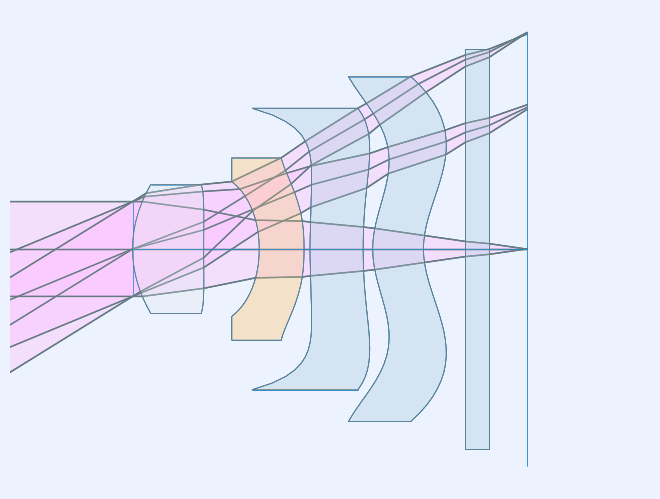

In [13]:
layout_plt0 = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()

In [14]:
elmn = [node.id for node in pt.nodes_with_tag(tag='#element')]

In [15]:
e1 = pt.obj_by_name('E1')
e2 = pt.obj_by_name('E2')
e3 = pt.obj_by_name('E3')
e4 = pt.obj_by_name('E4')
e5 = pt.obj_by_name('E5')

In [16]:
e2.do_flat1 = 'always'
e2.do_flat2 = 'always'
e3.do_flat1 = 'always'
e3.do_flat2 = 'always'
e4.do_flat1 = 'always'
e4.do_flat2 = 'always'

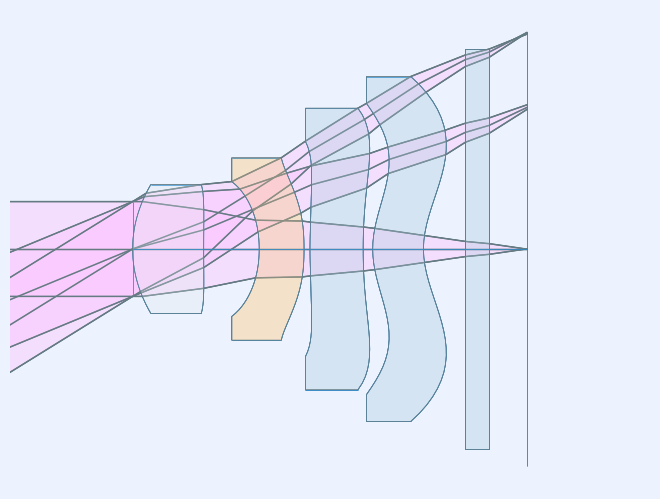

In [17]:
layout_plt1 = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()

In [18]:
e1.sd = 1.25

e2.sd = 1.75
e2.flat1 = 1.25
e2.flat2 = 1.645

e3.sd = 2.5
e3.flat1 = 2.1

e4.sd = 3.0
e4.flat1 = 2.6

e5.sd = 3.5

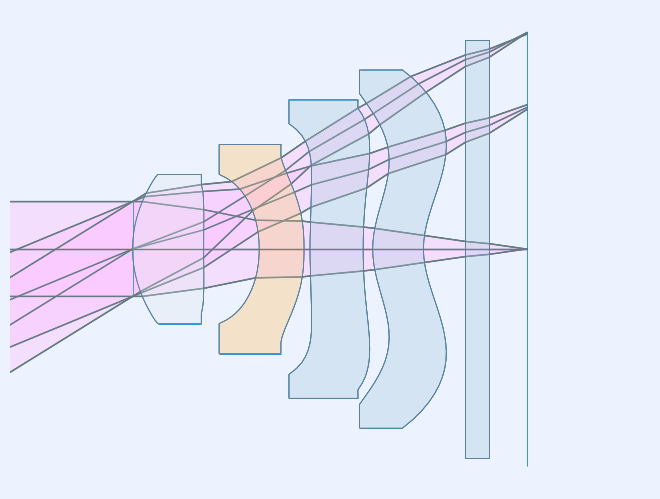

In [19]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()

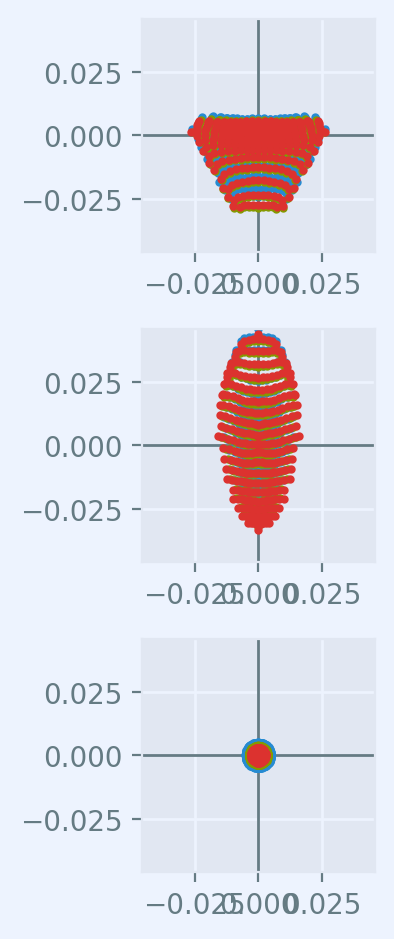

In [20]:
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, 
                      scale_type=Fit.All_Same, dpi=200, is_dark=isdark).plot()

In [21]:
opm.save_model("cell_phone_camera")

In [22]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(0)
marg_ray = trace_ray(opm, [0, 1], fld, wvl)
list_ray(marg_ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000            0     0.000000     0.000000     1.000000        1e+10
  1:      0.00000      0.79358            0     0.000000     0.000000     1.000000      0.16289
  2:      0.00000      0.79358      0.16289     0.000000    -0.130626     0.991432       1.0374
  3:      0.00000      0.65807    0.0013987     0.000000    -0.198145     0.980173       0.8858
  4:      0.00000      0.48255    -0.060365     0.000000    -0.019206     0.999816      0.78034
  5:      0.00000      0.46757    -0.030173     0.000000    -0.125566     0.992085      0.14089
  6:      0.00000      0.44988    0.0096048     0.000000    -0.092575     0.995706      0.89198
  7:      0.00000      0.36730    0.0077504     0.000000    -0.117805     0.993037      0.18869
  8:      0.00000      0.34507     0.035123     0.000000    -0.142455     0.989801      0.83994
  9:      0.00000      0.22542     0.016

In [23]:
dir0 = normalize(np.array([0.086, 0.173, 0.981]))
pt1 = np.array(-dir0)
sm.gaps[1].thi = dir0[2]
pt1[2] = 0.
dir0, [0.086, 0.173, 0.981], pt1

(array([0.08601351, 0.17302717, 0.98115405]),
 [0.086, 0.173, 0.981],
 array([-0.08601351, -0.17302717,  0.        ]))

In [24]:
wvl = sm.central_wavelength()

path = sm.path(wl=wvl, start=1)
skew_ray = rt.trace_raw(path, pt1, dir0, wvl)

list_ray(skew_ray[0])

            X            Y            Z           L            M            N               Len
  0:     -0.08601     -0.17303            0     0.086014     0.173027     0.981154     0.009449
  1:     -0.08520     -0.17139     0.009271     0.072254     0.145349     0.986739       1.1966
  2:      0.00126      0.00253   1.1955e-07     0.106304     0.213844     0.971066      0.94474
  3:      0.10169      0.20456    -0.012595     0.085295     0.171581     0.981471      0.75899
  4:      0.16643      0.33479    -0.017664     0.106581     0.214401     0.970913      0.12979
  5:      0.18026      0.36261    0.0083478     0.066253     0.133277     0.988862      0.90879
  6:      0.24047      0.48374     0.017019     0.115071     0.231480     0.966010      0.24881
  7:      0.26910      0.54133     0.097372     0.032613     0.065605     0.997313      0.88059
  8:      0.29782      0.59910       0.1256     0.126731     0.254936     0.958617       0.5992
  9:      0.37376      0.75186          

In [25]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)

In [26]:
ray_f1_r0 = trace_ray(opm, [0., 0.], fld, wvl)
list_ray(ray_f1_r0)

            X            Y            Z           L            M            N               Len
  0:      0.00000 -4133992479.29825            0     0.000000     0.382041     0.924145   1.0821e+10
  1:      0.00000     -0.00000            0     0.000000     0.382041     0.924145   2.6785e-14
  2:      0.00000     -0.00000   2.4226e-14     0.000000     0.259715     0.965685       1.2335
  3:      0.00000      0.32037    0.0012037     0.000000     0.384968     0.922930      0.87739
  4:      0.00000      0.65813     -0.11903     0.000000     0.381160     0.924509      0.76657
  5:      0.00000      0.95032     -0.16032     0.000000     0.400332     0.916370      0.31265
  6:      0.00000      1.07549     0.026181     0.000000     0.257929     0.966164       0.9887
  7:      0.00000      1.33050     0.091422     0.000000     0.441538     0.897243       0.3836
  8:      0.00000      1.49987      0.27561     0.000000     0.300087     0.953912       1.0019
  9:      0.00000      1.80052     

In [27]:
ray_f1_py = trace_ray(opm, [0., 1.], fld, wvl)
list_ray(ray_f1_py)

            X            Y            Z           L            M            N               Len
  0:      0.00000 -4133992479.29825            0     0.000000     0.382041     0.924145   1.0821e+10
  1:      0.00000      0.79358            0     0.000000     0.382041     0.924145      0.21569
  2:      0.00000      0.87598      0.19933     0.000000     0.088675     0.996061      0.97797
  3:      0.00000      0.96270    -0.016556     0.000000     0.064387     0.997925        0.623
  4:      0.00000      1.00282     -0.32485     0.000000     0.322392     0.946606      0.82812
  5:      0.00000      1.26980     -0.29095     0.000000     0.281957     0.959427      0.43129
  6:      0.00000      1.39140     0.022842     0.000000     0.208223     0.978081      0.99819
  7:      0.00000      1.59925      0.10915     0.000000     0.329759     0.944065      0.32274
  8:      0.00000      1.70567      0.25384     0.000000     0.283035     0.959110      0.99581
  9:      0.00000      1.98752     

In [28]:
ray_f1_my = trace_ray(opm, [0., -1.], fld, wvl)
list_ray(ray_f1_my)

            X            Y            Z           L            M            N               Len
  0:      0.00000 -4133992479.29825            0     0.000000     0.382041     0.924145   1.0821e+10
  1:      0.00000     -0.79358            0     0.000000     0.382041     0.924145      0.15109
  2:      0.00000     -0.73586      0.13963     0.000000     0.375277     0.926913       1.1344
  3:      0.00000     -0.31014    0.0011435     0.000000     0.548928     0.835870       1.0872
  4:      0.00000      0.28664    -0.020134     0.000000     0.400058     0.916490      0.78058
  5:      0.00000      0.59891    -0.054742     0.000000     0.508026     0.861342      0.19864
  6:      0.00000      0.69983     0.016354     0.000000     0.326388     0.945236       0.9873
  7:      0.00000      1.02207     0.059586     0.000000     0.555786     0.831326      0.43431
  8:      0.00000      1.26345      0.26064     0.000000     0.312257     0.949998        1.014
  9:      0.00000      1.58007     